In [2]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
with open("results/in-context-learning/lama-3.1-70B/results.pkl", "rb") as f:
    l_results = pickle.load(f)

In [4]:
from functools import reduce

In [5]:
df_results = pd.concat(l_results, ignore_index=True)

In [6]:
pd.unique(df_results.participant_id)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [7]:
df_results["accuracy"].mean()

0.37844019909237303

In [19]:
df_results["trial_id_cut"] = pd.cut(df_results.trial_id, 20, labels=False) +1

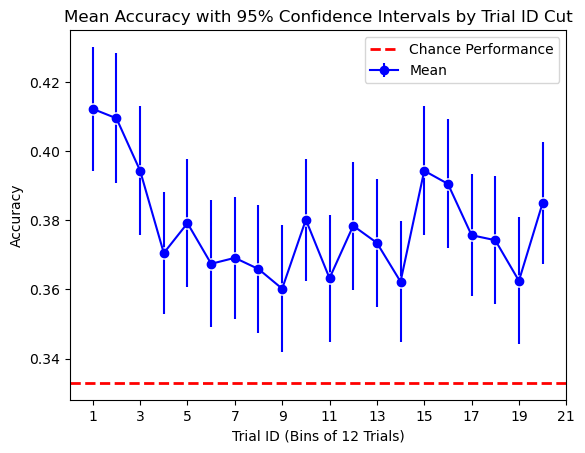

In [30]:

# Define a function to calculate the standard error (SE)
def ci_95(x):
    return 1.96 * np.std(x, ddof=1) / np.sqrt(len(x))

# Aggregate mean and SE
df_agg = df_results.groupby("trial_id_cut")["accuracy"].aggregate(['mean', ci_95]).reset_index(drop=False)

# Plot the mean with error bars
ax = df_agg.plot(x="trial_id_cut", y='mean', yerr='ci_95', kind='line', marker='o', color='blue', label="")

# Overlay the white markers (base layer)
ax.plot(df_agg["trial_id_cut"], df_agg["mean"], 'wo', markersize=8)  # White points (larger size)

# Overlay the actual points (top layer)
ax.plot(df_agg["trial_id_cut"], df_agg["mean"], 'bo', markersize=5)  # Blue points (actual size)

# Set labels and title
ax.set_ylabel("Accuracy")
ax.set_xlabel("Trial ID (Bins of 12 Trials)")
ax.set_title("Mean Accuracy with 95% Confidence Intervals by Trial ID Cut")
plt.axhline(y=.333, color='r', linestyle='--', linewidth=2, label='Chance Performance')
ax.set_xticks(np.arange(0, df_agg["trial_id_cut"].max() + 1, 2) + 1)
plt.legend()

plt.show()


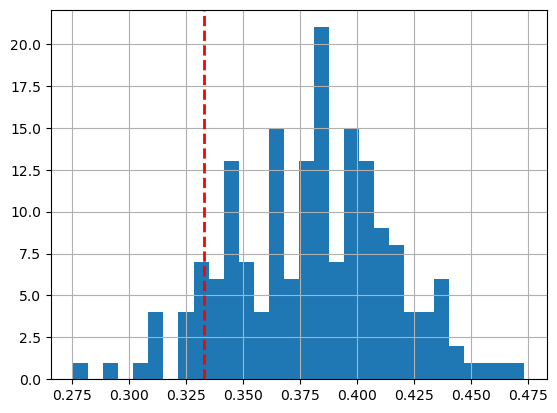

In [77]:
ax = df_results.groupby("participant_id")["accuracy"].mean().hist(bins=30)
plt.axvline(x=.333, color='r', linestyle='--', linewidth=2, label='Chance Performance')
